# **Project 1: Data Manipulation, Handling Missing Data, Data Visualization**

**1. Load the dataset file, 'titanic.csv' from the following link:**

In [172]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [173]:
df=pd.read_csv('https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv')
df_new=df.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**2. Find out all the feature names where Null values exist.**

In [174]:
nullColums=df.columns[df.isnull().sum() > 0]
print(nullColums)

Index(['Age', 'Cabin', 'Embarked'], dtype='object')


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**3. Fill the null values of the 'Age' column with the mean of the other values.
And also fill the Null values of the 'Cabin' column with 'Unknown'**

In [176]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [177]:
print(df[['Age', 'Cabin']])

           Age    Cabin
0    22.000000  Unknown
1    38.000000      C85
2    26.000000  Unknown
3    35.000000     C123
4    35.000000  Unknown
..         ...      ...
886  27.000000  Unknown
887  19.000000      B42
888  29.699118  Unknown
889  26.000000     C148
890  32.000000  Unknown

[891 rows x 2 columns]


**4. Plot the dataset with 2 bars; Survived, Dead.**

**And include Female and Male survivors' measurement in each bar.**

In [178]:
#Grouping Data by Survival and Sex
total_survived=df.groupby(['Survived', 'Sex']).size()
print(total_survived)

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64


In [179]:
#Separeted Dead and survived
dead=total_survived.loc[0]
survived=total_survived.loc[1]
print(dead)
print(survived)

Sex
female     81
male      468
dtype: int64
Sex
female    233
male      109
dtype: int64


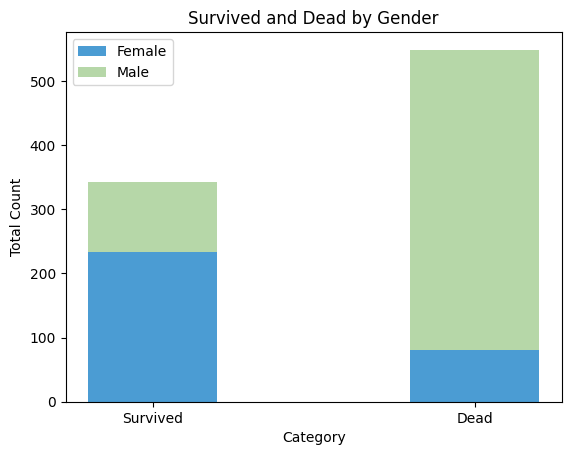

In [180]:
dead_female,dead_male=dead['female'],dead['male']
survived_female,survived_male=survived['female'],survived['male']
X=['Survived', 'Dead']
width=0.4
x=np.arange(len(X))
plt.bar(X[0], survived_female, width=width,color='#4B9CD3')
plt.bar(X[0], survived_male, width=width, bottom=survived_female, color='#B6D7A8')
plt.bar(X[1], dead_female, width=width, color='#4B9CD3', label='Female')
plt.bar(X[1], dead_male, width=width, bottom=dead_female, color='#B6D7A8', label='Male')
plt.xticks(x, X)
plt.title('Survived and Dead by Gender')
plt.xlabel('Category')
plt.ylabel('Total Count')
plt.legend()
plt.show()

**5. Follow the step 4 and include the Survived, and Dead bars amongst the 'Pclass'**

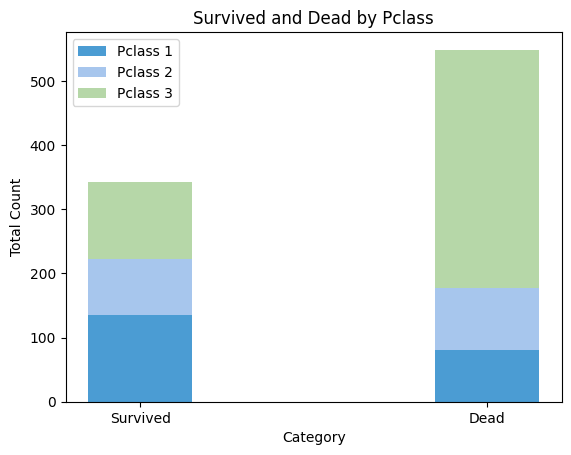

In [181]:
pclass_survived = df.groupby(['Pclass', 'Survived']).size()
pclass_1=pclass_survived.loc[1]
pclass_2=pclass_survived.loc[2]
pclass_3=pclass_survived.loc[3]
dead_class1,dead_class2,dead_class3=pclass_1[0],pclass_2[0],pclass_3[0]
survived_class1,survived_class2,survived_class3=pclass_1[1],pclass_2[1],pclass_3[1]
X=['Survived', 'Dead']
width=0.3
x=np.arange(len(X))
plt.bar(X[0], survived_class1, width=width, color='#4B9CD3',  label='Pclass 1')
plt.bar(X[0], survived_class2, width=width, bottom=survived_class1, color='#A7C6ED',  label='Pclass 2')
plt.bar(X[0], survived_class3, width=width, bottom=survived_class1+survived_class2, color='#B6D7A8',  label='Pclass 3')
plt.bar(X[1], dead_class1, width=width, color='#4B9CD3')
plt.bar(X[1], dead_class2, width=width, bottom=dead_class1, color='#A7C6ED')
plt.bar(X[1], dead_class3, width=width, bottom=dead_class1+dead_class2,color='#B6D7A8')
plt.xticks(x,X)
plt.title('Survived and Dead by Pclass')
plt.xlabel('Category')
plt.ylabel('Total Count')
plt.legend()
plt.show()

**6. Create a column named 'AgeClass' and insert values;**
* 0 if age <= 16
* 1 if age <= 26
* 2 if age <= 36
* 3 if age <= 62
* 4 otherwise

In [182]:
df.loc[df['Age']<=16, 'AgeClass']=0
df.loc[(df['Age']>16) & (df['Age']<=26), 'AgeClass']=1
df.loc[(df['Age']>26) & (df['Age']<=36), 'AgeClass']=2
df.loc[(df['Age']>36) & (df['Age']<=62), 'AgeClass']=3
df.loc[df['Age']>62 , 'AgeClass']=4

In [183]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1.0


**7. Now drop the column 'Age'.**

In [184]:
df.drop(columns=['Age'],inplace=True)

In [185]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Unknown,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Unknown,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Unknown,S,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,Unknown,S,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,Unknown,S,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,1.0


**8. Follow step 4 and create a bar plot of Survived and Dead using the value counts amongst 'AgeClass'
groups.**

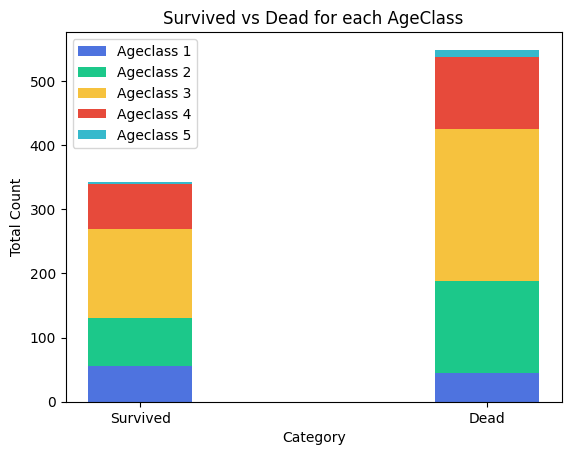

In [186]:
AgeClass_survived=df.groupby(['AgeClass', 'Survived']).size()
AgeClass_1=AgeClass_survived.loc[0.0]
AgeClass_2=AgeClass_survived.loc[1.0]
AgeClass_3=AgeClass_survived.loc[2.0]
AgeClass_4=AgeClass_survived.loc[3.0]
AgeClass_5=AgeClass_survived.loc[4.0]
dead_AgeClass1,dead_AgeClass2,dead_AgeClass3,dead_AgeClass4,dead_AgeClass5=AgeClass_1[0],AgeClass_2[0],AgeClass_3[0],AgeClass_4[0],AgeClass_5[0]
survived_AgeClass1,survived_AgeClass2,survived_AgeClass3,survived_AgeClass4,survived_AgeClass5=AgeClass_1[1],AgeClass_2[1],AgeClass_3[1],AgeClass_4[1],AgeClass_5[1]
X=['Survived', 'Dead']
#print(AgeClass_survived)
width=0.3
x=np.arange(len(X))
plt.bar(X[0], survived_AgeClass1, width=width,color='#4E73DF',  label='Ageclass 1')
plt.bar(X[0], survived_AgeClass2, width=width, bottom=survived_AgeClass1,  color='#1CC88A',  label='Ageclass 2')
plt.bar(X[0], survived_AgeClass3, width=width, bottom=survived_AgeClass1+survived_AgeClass2, color='#F6C23E',  label='Ageclass 3')
plt.bar(X[0], survived_AgeClass4, width=width, bottom=survived_AgeClass1+survived_AgeClass2+survived_AgeClass3,  color='#E74A3B',  label='Ageclass 4')
plt.bar(X[0], survived_AgeClass5, width=width, bottom=survived_AgeClass1+survived_AgeClass2+survived_AgeClass3+survived_AgeClass4, color='#36B9CC',  label='Ageclass 5')
plt.bar(X[1],dead_AgeClass1, width=width,color='#4E73DF' )
plt.bar(X[1], dead_AgeClass2, width=width, bottom=dead_AgeClass1,  color='#1CC88A' )
plt.bar(X[1], dead_AgeClass3, width=width, bottom=dead_AgeClass1+dead_AgeClass2, color='#F6C23E' )
plt.bar(X[1], dead_AgeClass4, width=width, bottom=dead_AgeClass1+dead_AgeClass2+dead_AgeClass3,  color='#E74A3B',)
plt.bar(X[1], dead_AgeClass5, width=width, bottom=dead_AgeClass1+dead_AgeClass2+dead_AgeClass3+dead_AgeClass4, color='#36B9CC' )
plt.xticks(x,X)
plt.xlabel('Category')
plt.ylabel('Total Count')
plt.title('Survived vs Dead for each AgeClass')
plt.legend()
plt.show()

In [187]:
AgeClass_survived=df.groupby(['AgeClass', 'Survived']).size()
print(AgeClass_survived)

AgeClass  Survived
0.0       0            45
          1            55
1.0       0           144
          1            75
2.0       0           237
          1           140
3.0       0           111
          1            69
4.0       0            12
          1             3
dtype: int64


**Assignments**

**1. Create a Scatter plot of Male and Female Survivors.
Display Passengers’ Age on the X-axis, and Fare on the Y-axis.
Note: Use color = ‘green’ for male and color = ‘red’ for female**

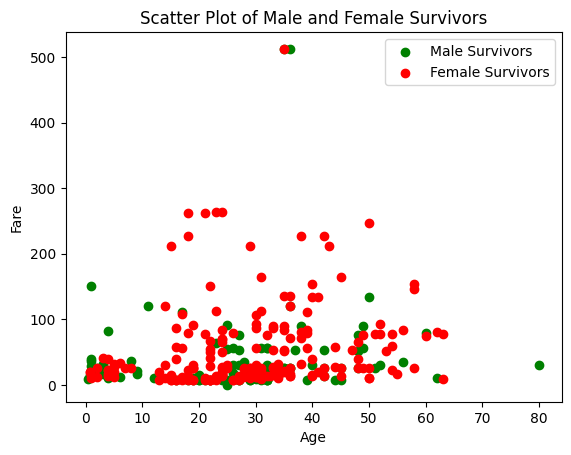

In [188]:
#df_new=df.copy() because i drop the age column
male_survivors=df_new[(df_new['Survived']==1)&(df_new['Sex']=='male')]
female_survivors=df_new[(df_new['Survived']==1)&(df_new['Sex']=='female')]
plt.scatter(male_survivors['Age'],male_survivors['Fare'],color='green',label='Male Survivors')
plt.scatter(female_survivors['Age'],female_survivors['Fare'],color='red',label='Female Survivors')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Male and Female Survivors')
plt.legend()
plt.show()